In [78]:
# conjunto de dados de treinamento linear com pequeno ruido gaussiano

import numpy as np
import matplotlib.pyplot as plt

# numero de amostras
N = 50

# parametros da reta
a = 2
b = 3

# ruido gaussiano
mu = 0
sigma = 0.5

# gerando os dados
x = np.random.rand(N) * 10
y = a*x + b + np.random.normal(mu, sigma, N)

# Adicionando 10 outliers
x_out = np.random.rand(10) * 10 + 5
y_out = 10 + np.random.normal(mu, sigma, 10)

x_with_outlier = np.concatenate((x, x_out))
y_with_outlier = np.concatenate((y, y_out))

Text(0, 0.5, 'y')

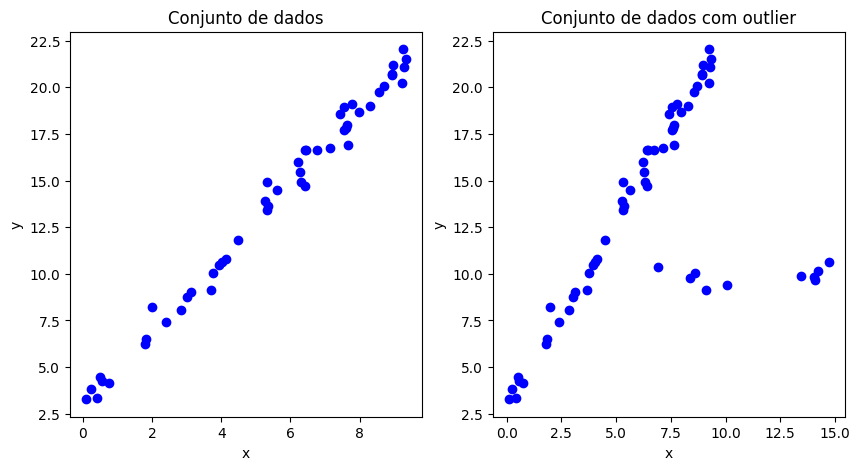

In [79]:
# plotando os dados
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(x, y, color='blue')
ax[0].set_title('Conjunto de dados')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].scatter(x_with_outlier, y_with_outlier, color='blue')
ax[1].set_title('Conjunto de dados com outlier')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')

## Treinando os modelos

In [80]:
def linear_model(x, y):
    x = np.array(x)
    y = np.array(y)
    x = np.c_[np.ones(x.shape[0]), x]
    beta = np.linalg.inv(x.T @ x) @ x.T @ y
    return beta

In [81]:
# Modelo linear sem outlier
beta = linear_model(x, y)

# Modelo linear com outlier
beta_with_outlier = linear_model(x_with_outlier, y_with_outlier)

print ('Coeficientes do modelo sem outlier:', beta)
print ('Coeficientes do modelo com outlier:', beta_with_outlier)

Coeficientes do modelo sem outlier: [2.95518331 1.9871061 ]
Coeficientes do modelo com outlier: [8.08973942 0.78597147]


Text(0, 0.5, 'y')

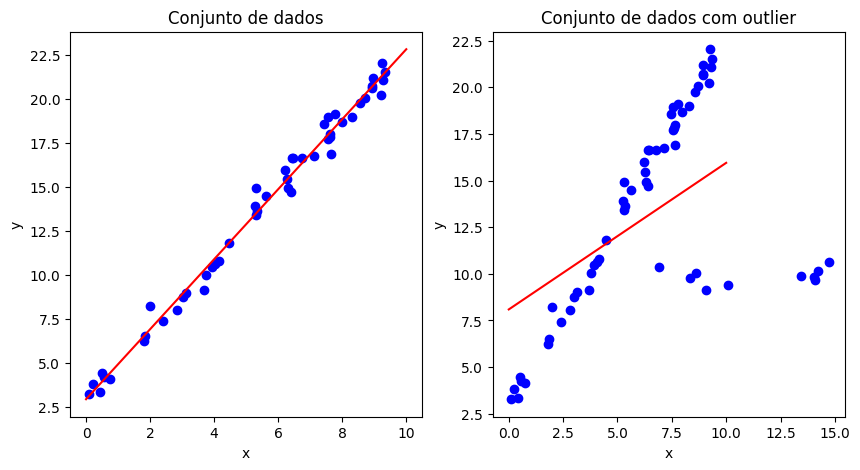

In [82]:
# plotando a reta

x_plot = np.linspace(0, 10, 100)
y_plot = beta[0] + beta[1]*x_plot
y_plot_with_outlier = beta_with_outlier[0] + beta_with_outlier[1]*x_plot

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(x, y, color='blue')
ax[0].plot(x_plot, y_plot, color='red')
ax[0].set_title('Conjunto de dados')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].scatter(x_with_outlier, y_with_outlier, color='blue')
ax[1].plot(x_plot, y_plot_with_outlier, color='red')
ax[1].set_title('Conjunto de dados com outlier')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')


## Removendo os outliers

In [83]:
x_without_outlier = x_with_outlier[:-10]
y_without_outlier = y_with_outlier[:-10]

In [84]:
def gradient_loss(beta, X, Y):
    X = np.column_stack([np.ones(len(X)), X])
    Y = Y[:, np.newaxis]
    
    # Calcula o gradiente da perda com base nos coeficientes beta e no conjunto de dados X e Y
    gradient = 2 * X.T @ (X @ beta.T - Y)
    return gradient.T

def Hessian_loss(beta, X, Y):
    X = np.column_stack([np.ones(len(X)), X])
    
    # Calcula a Hessiana da perda com base nos coeficientes beta e no conjunto de dados X e Y
    Hessian = 2 * X.T @ X
    return Hessian

In [85]:
w_star = np.array(beta_with_outlier)

# Coloca mais uma dimensão no vetor w_star
w_star = w_star[:, np.newaxis].T
lambda_val = 0.1
Delta = lambda_val * w_star * (len(x_with_outlier) - len(x_without_outlier)) + gradient_loss(w_star, x_with_outlier[-10:], y_with_outlier[-10:])

H_w_star_inv = np.linalg.inv(Hessian_loss(beta_with_outlier, x_with_outlier[:-10], y_with_outlier[:-10]))

w_minus = w_star + (H_w_star_inv @ Delta.T).T

In [86]:
print ('Coeficientes do modelo treinando sem o outlier:', beta)
print ('Coeficientes do modelo treinando com o outlier:', beta_with_outlier)
print ('Coeficientes do modelo treinando com o outlier e depois removendo:', w_minus)

Coeficientes do modelo treinando sem o outlier: [2.95518331 1.9871061 ]
Coeficientes do modelo treinando com o outlier: [8.08973942 0.78597147]
Coeficientes do modelo treinando com o outlier e depois removendo: [[3.33115955 1.93308545]]


Text(0, 0.5, 'y')

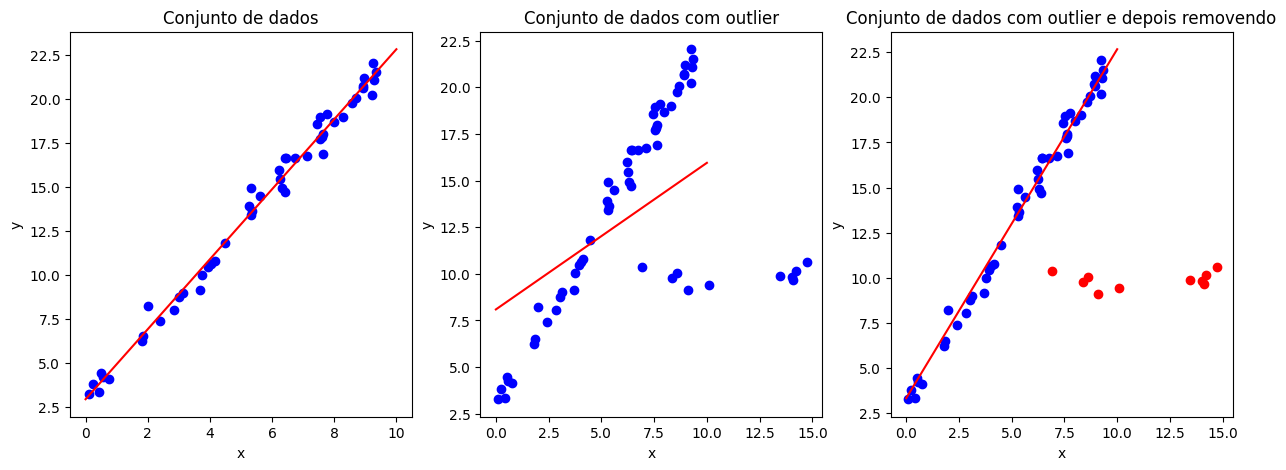

In [87]:
# plotando a reta

x_plot = np.linspace(0, 10, 100)
y_plot = beta[0] + beta[1]*x_plot
y_plot_with_outlier = beta_with_outlier[0] + beta_with_outlier[1]*x_plot
y_plot_minus = w_minus[0, 0] + w_minus[0, 1]*x_plot

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].scatter(x, y, color='blue')
ax[0].plot(x_plot, y_plot, color='red')
ax[0].set_title('Conjunto de dados')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].scatter(x_with_outlier, y_with_outlier, color='blue')
ax[1].plot(x_plot, y_plot_with_outlier, color='red')
ax[1].set_title('Conjunto de dados com outlier')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')


ax[2].scatter(x_with_outlier[-10:], y_with_outlier[-10:], color='red')
ax[2].scatter(x_without_outlier, y_without_outlier, color='blue')
ax[2].plot(x_plot, y_plot_minus, color='red')
ax[2].set_title('Conjunto de dados com outlier e depois removendo')
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')

